# Preparação da base de dados

### \- Carregue o arquivo no ambiente do Deepnote e mostre as dimensões e tipos de dados das colunas relevantes\.
\- Padronize o campo price, removendo símbolos de moeda e convertendo para tipo numérico\.
\- Selecione apenas as colunas relevantes para a análise:
\['price', 'minimum\_nights', 'number\_of\_reviews', 'availability\_365',
'review\_scores\_rating', 'room\_type'\]\.
\- Descreva em Markdown o papel de cada variável na análise \(numérica ou categórica\)\.

In [1]:
!pip uninstall matplotlib seaborn matplotlib-inline -y
!pip install matplotlib seaborn matplotlib-inline

import pandas as pd
df = pd.read_csv("listings_rio.csv")
df

Found existing installation: matplotlib 3.10.7
Uninstalling matplotlib-3.10.7:
  Successfully uninstalled matplotlib-3.10.7
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: matplotlib-inline 0.1.7
Not uninstalling matplotlib-inline at /toolkit-cache/1.1.5/python3.10/kernel-libs/lib/python3.10/site-packages, outside environment /root/venv
Can't uninstall 'matplotlib-inline'. No files were found to uninstall.
  Using cached matplotlib-3.10.7-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20250624193519,2025-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.78,4.67,NaN,f,1,1,0,0,1.86
1,25026,https://www.airbnb.com/rooms/25026,20250624193519,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.93,4.85,4.65,NaN,f,1,1,0,0,1.71
2,35764,https://www.airbnb.com/rooms/35764,20250624193519,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.95,4.89,NaN,f,1,1,0,0,2.88
3,48305,https://www.airbnb.com/rooms/48305,20250624193519,2025-06-26,city scrape,Bright 6bed Penthouse Seconds from Beach,Enter Bossa Nova's history by staying in the v...,Enter Bossa Nova history by staying in the ver...,https://a0.muscache.com/pictures/miso/Hosting-...,70933,...,4.84,4.95,4.59,NaN,t,6,5,1,0,1.05
4,48901,https://www.airbnb.com/rooms/48901,20250624193519,2025-07-01,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,LARGE Beach side 4 bedrooms 2 Complete bathro...,"Plenty of shops, entertainment andrestaurants<...",https://a0.muscache.com/pictures/hosting/Hosti...,222884,...,4.83,4.94,4.60,NaN,f,1,1,0,0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,1450108622211032237,https://www.airbnb.com/rooms/1450108622211032237,20250624193519,2025-06-28,city scrape,Aconchego Constante,"Overlooking the sea, Aconchego Constante is an...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,703072927,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
42568,1450108828266063076,https://www.airbnb.com/rooms/1450108828266063076,20250624193519,2025-06-26,city scrape,Quarto casal,Premium and cozy location.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,320682549,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
42569,1450124185987579534,https://www.airbnb.com/rooms/1450124185987579534,20250624193519,2025-06-30,city scrape,Cama em Dorm Misto (9) com AC,"Single bed in a mixed room with nine beds, loc...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,37776540,...,NaN,NaN,NaN,NaN,t,8,0,4,4,NaN
42570,1450124362124784419,https://www.airbnb.com/rooms/1450124362124784419,20250624193519,2025-06-26,city scrape,Quarto para casal,Great location and cozy room to enjoy your trip.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,378959794,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [2]:
# id é o identificador único. price . 

print(f"Dimensoes dataset completo: {df.shape}")
df_l = df[['id','price', 'minimum_nights', 'number_of_reviews', 'availability_365',
'review_scores_rating', 'room_type']].copy()
df_l.price = df_l.price.str.replace('$','').str.replace(',','').astype(float)
print(f"Dimensoes dataset limpo: {df_l.shape}")
print(f"Tipos: \n{df_l.dtypes}")

Dimensoes dataset completo: (42572, 79)
Dimensoes dataset limpo: (42572, 7)
Tipos: 
id                        int64
price                   float64
minimum_nights            int64
number_of_reviews         int64
availability_365          int64
review_scores_rating    float64
room_type                object
dtype: object


#  Correlação e análise multivariável

### Calcule a matriz de correlação de Pearson entre as variáveis numéricas\.

In [3]:
corr = df_l[['price','minimum_nights','number_of_reviews','availability_365','review_scores_rating']].corr()
corr

,price,minimum_nights,number_of_reviews,availability_365,review_scores_rating
price,1.000000,0.018127,-0.043306,0.049289,-0.000932
minimum_nights,0.018127,1.000000,-0.030574,0.021239,0.004274
number_of_reviews,-0.043306,-0.030574,1.000000,-0.108874,0.052150
availability_365,0.049289,0.021239,-0.108874,1.000000,-0.066743
review_scores_rating,-0.000932,0.004274,0.052150,-0.066743,1.000000


### Visualize os resultados com um heatmap de correlação\.

<Axes: >

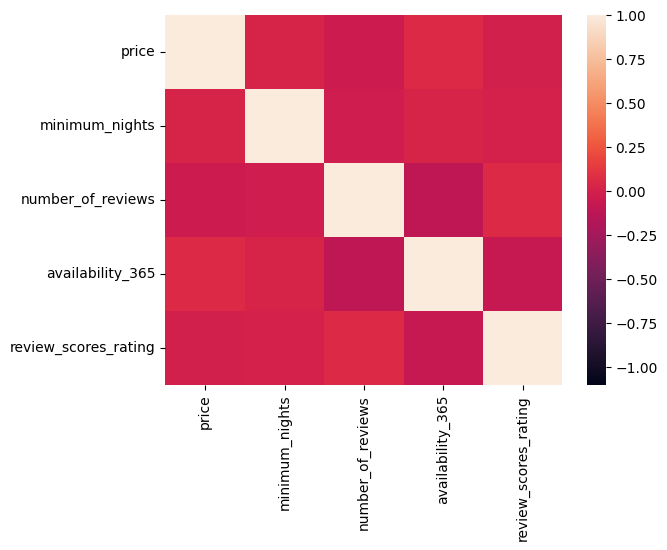

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, vmin=1, vmax=-1)

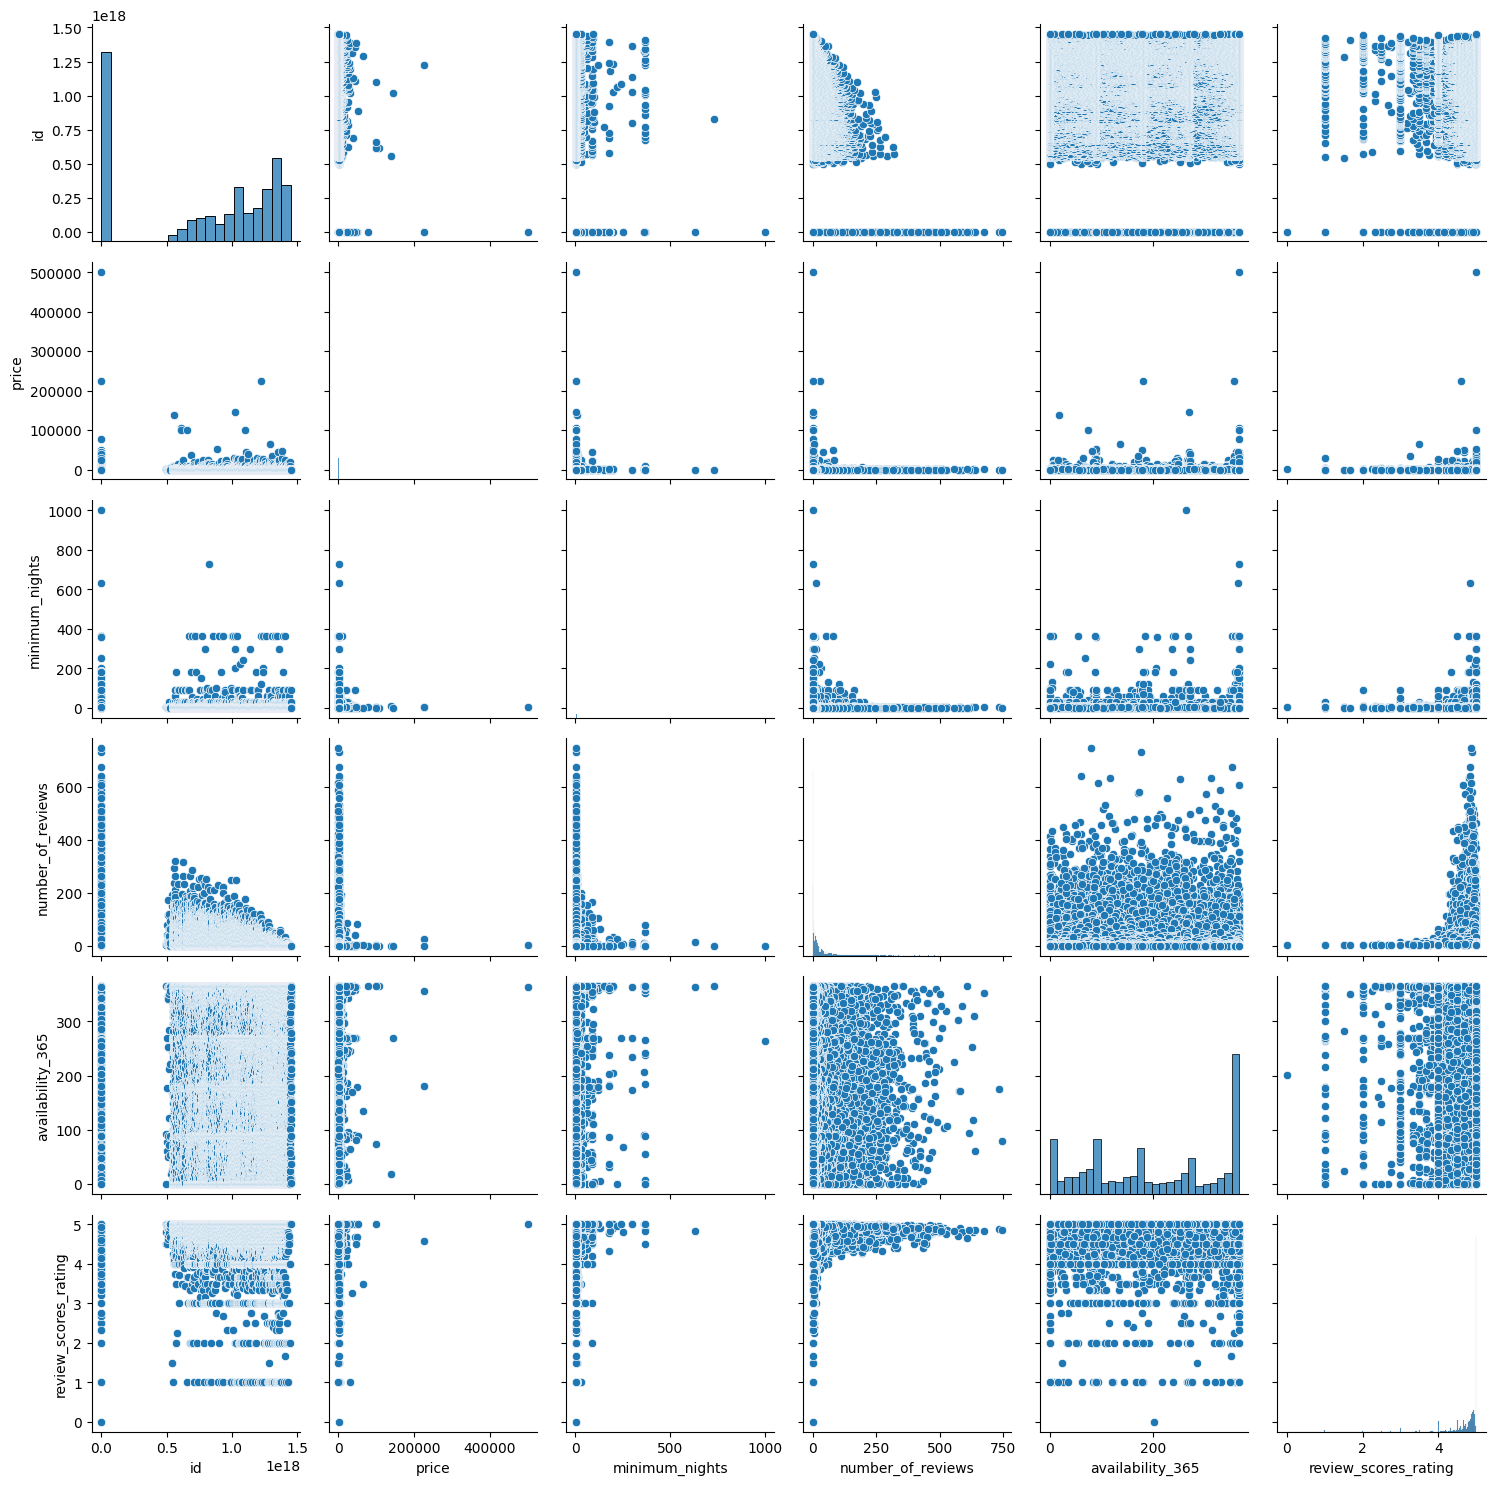

In [5]:
g = sns.PairGrid(df_l)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Identifique as correlações mais fortes \(\|r\| ≥ 0\.4\) e discuta o que elas representam no contexto do mercado\.

Dentre as colunas selecionadas, analisando todos os registros do dataset, não foi encontrada nenhuma correlação forte. Ou seja, não há, num primeiro momento, entre as váriáveis numéricas, um padrão forte. Podemos assim concluir que ou um padrão pode ser identificado entre essas variáveis em um recorte diferente do dataset, ou há padrões somente entre outras variáveis. 

### Construa gráficos de dispersão \(scatter plots\) entre pares de variáveis fortemente correlacionadas\.

<Axes: xlabel='number_of_reviews', ylabel='review_scores_rating'>

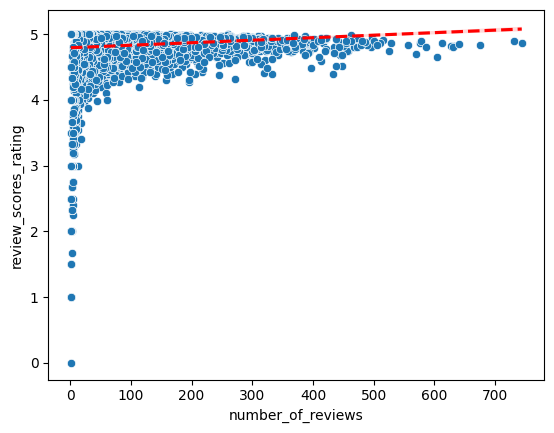

In [6]:
# na visualização que montei via PairGrid, existem algumas variáveis que parecem sim ter correlação, 
#  mas por conta de vários outliers aparecem com correlação fraca, então farei com uma delas.
#  as variáveis são: number_of_reviews x reviews_scores_rating,

sns.scatterplot(df_l, x='number_of_reviews', y='review_scores_rating')

sns.regplot(
    data=df_l,
    x='number_of_reviews',
    y='review_scores_rating',
    color='red',
    scatter=False,
    line_kws={'linestyle': '--'}
)

### Inclua uma variável categórica \(room\_type\) para realizar uma análise multivariável e comparar comportamentos entre grupos\.

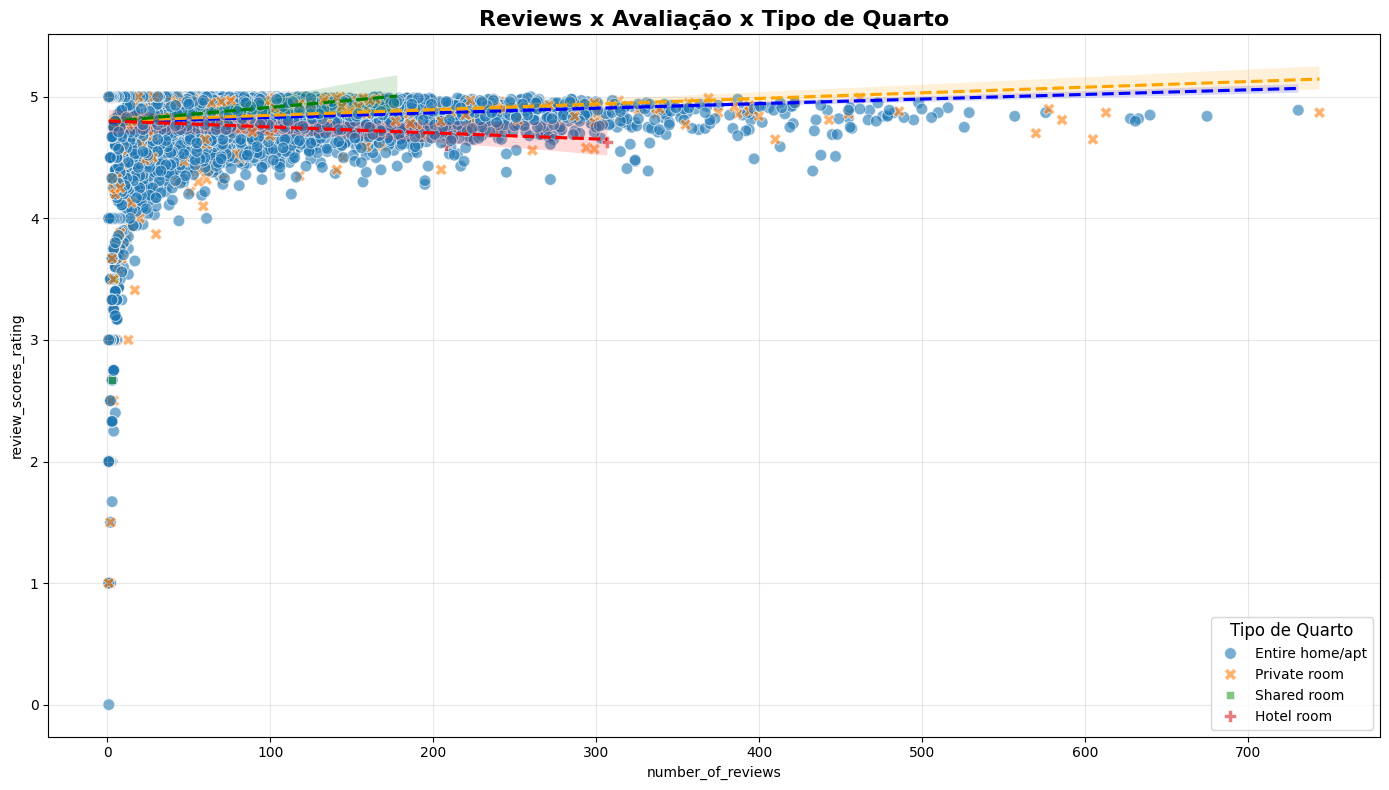

In [7]:
plt.figure(figsize=(14, 8))

# Scatterplot com mais configurações
scatter = sns.scatterplot(
    data=df_l,
    x='number_of_reviews',
    y='review_scores_rating',
    hue='room_type',
    style='room_type',
    alpha=0.6,
    s=70
)

plt.title('Reviews x Avaliação x Tipo de Quarto', 
          fontsize=16, fontweight='bold')

sns.regplot(
    data=df_l[df_l['room_type'] == 'Entire home/apt'],
    x='number_of_reviews',
    y='review_scores_rating',
    color='blue',
    scatter=False,
    line_kws={'linestyle': '--'}
)

sns.regplot(
    data=df_l[df_l['room_type'] == 'Private room'],
    x='number_of_reviews',
    y='review_scores_rating',
    color='orange',
    scatter=False,
    line_kws={'linestyle': '--'}
)

sns.regplot(
    data=df_l[df_l['room_type'] == 'Shared room'],
    x='number_of_reviews',
    y='review_scores_rating',
    color='green',
    scatter=False,
    line_kws={'linestyle': '--'}
)

sns.regplot(
    data=df_l[df_l['room_type'] == 'Hotel room'],
    x='number_of_reviews',
    y='review_scores_rating',
    color='red',
    scatter=False,
    line_kws={'linestyle': '--'}
)

plt.legend(title='Tipo de Quarto', title_fontsize=12, fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretação estatística e distribuições

### Explique, em Markdown, o significado de correlação positiva, negativa e nula\.

Correlação positiva é quando há uma alteração em uma variável que se reflete em alguma escala relevante em outra, na mesma direção, exemplo: quanto maior a avaliação de uma hospedagem, mais hospedagens no ano. Correlação negativa é esse comportamento mas no sentido contrário, exemplo: quanto maior a avaliação de uma hospedagem, menor a disponibilidade no ano. Correlação nula é quando não há uma alteração relevante em uma variável comparando com outra variável, ou não há uma tendência clara (os exemplos das correlações das variáveis não necessáriamente são corretos na base, apenas uma suposição). 

### Relacione as variáveis analisadas com possíveis distribuições estatísticas \(Normal, Log\-Normal, Poisson\), justificando suas escolhas\.

A distribuição normal, seria a distribuição classica em forma de sino. A normal logaritmica seria uma distribuição em que o log da variável segue uma distribuição normal. A de poisson uma distribuição de probabilidade discreta, que possui formatos diferentes conforme a quantidade de ocorrencias no período de tempo X, seguindo padrão de onda quebrando. Para 'price','minimum_nights','number_of_reviews','availability_365', 'review_scores_rating', minha teoria é que a distribuição estará mais próxima da normal logaritmica, pois tende a concentrar vários valores próximos ou iguais em um só ponto, com poucos valores diferentes, representando um padrão no mercado. E 'room_type' uma distribuição mais próxima a normal, espero uma variabilidade de tipos de hospedagens.

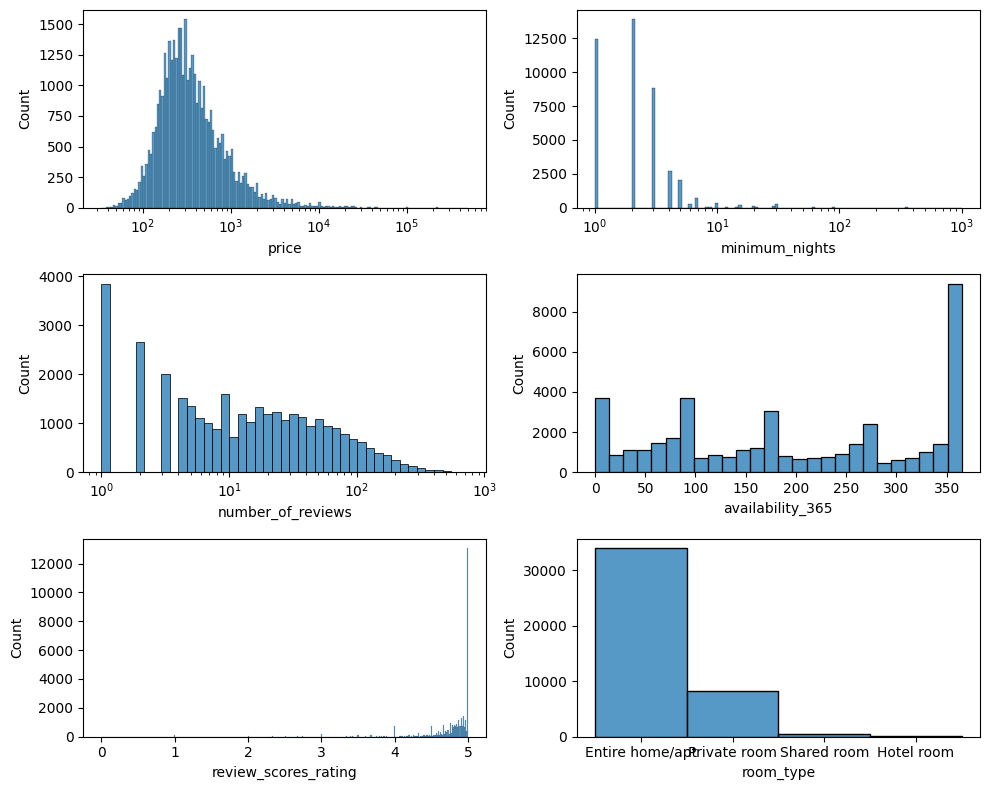

In [65]:
# 'price','minimum_nights','number_of_reviews','availability_365', 'review_scores_rating'
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(10,8))
sns.histplot(df_l.price, ax=axes[0,0], log_scale=True)
sns.histplot(df_l.minimum_nights, ax=axes[0,1], log_scale=True)
sns.histplot(df_l.number_of_reviews, ax=axes[1,0], log_scale=True)
sns.histplot(df_l.availability_365, ax=axes[1,1])
sns.histplot(df_l.review_scores_rating, ax=axes[2,0])
sns.histplot(df_l.room_type, ax=axes[2,1])

plt.tight_layout()
plt.show()

A roow_type parece ser logaritmica também e a avaliability 365 parece ser poisson, mês a mês.

### Interprete os resultados obtidos, destacando relações lineares ou não lineares e possíveis implicações para modelagem\.

Reviews x Avaliação, parece ter uma relação não linear, a função da relação seria bem representada por uma função logarítimica. A implicação seria analisar apenas os registros com avaliações mais altas, deixando de lado grande parte das acomodações, ao tentar verificar o comportamento de hospedagens mais populares por exemplo.  

# Variáveis dependentes, independentes e divisão dos dados

### Explique em Markdown o conceito de variáveis dependentes e independentes no contexto da modelagem de preços\.

A variável dependente é a variável objetivo/alvo da análise, a que queremos explicar. A variável independente é a que explica/influencia a variável dependente.

### Separe as variáveis explicativas \(X\) e a variável alvo \(y = price\)\.

variável alvo é o 'price' e as variáveis explicativas são o 'avaliability_365', 'number_of_reviews' e 'minimun_nights' que tem algum tipo de correlação com price, no minimo 0.01.

### Utilize o método train\_test\_split \(Scikit\-learn\) para dividir os dados em 70% treino e 30% teste, com random\_state fixo\.

In [134]:
from sklearn.model_selection import train_test_split
import pandas as pd

variaveis = ['availability_365', 'number_of_reviews', 'minimum_nights']

y = df_l['price']
X = df_l[variaveis]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,      
    random_state=42,
    shuffle=True
)

print(f"Dados de Treino: {X_train.shape[0]} amostras")
print(f"Dados de Teste:  {X_test.shape[0]} amostras")

Dados de Treino: 29800 amostras
Dados de Teste:  12772 amostras


### Explique, em Markdown, a importância da separação entre treino e teste para evitar data leakage\.

Para que o modelo não pareça performar melhor do que realmente performa. É importante deixar estas amostrar como teste, para testar realmente o modelo, utilizando dados diferentes como em um cenário real, ao invés de um conjunto 'viciado' que é o utilizado para modelar mas não o ideal para os testes.

#  Normalização dos dados

### Aplique o método MinMaxScaler às variáveis numéricas independentes\.

In [137]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[variaveis] = scaler.fit_transform(X_train[variaveis])
X_test_scaled[variaveis] = scaler.transform(X_test[variaveis])
    
print("Normalização aplicada com sucesso!")

Normalização aplicada com sucesso!


### Compare as estatísticas descritivas antes e depois da normalização \(mínimo, máximo, média e desvio padrão\)\.

In [152]:
print(f"Variaveis antes: \n")
print(f"availability_365 minimo: {df.availability_365.min()}")
print(f"availability_365 maximo: {df.availability_365.max()}")
print(f"availability_365 media: {df.availability_365.mean()}")
print(f"availability_365 desvio: {df.availability_365.std()}")

print(f"number_of_reviews minimo: {df.number_of_reviews.min()}")
print(f"number_of_reviews maximo: {df.number_of_reviews.max()}")
print(f"number_of_reviews media: {df.number_of_reviews.mean()}")
print(f"number_of_reviews desvio: {df.number_of_reviews.std()}")

print(f"minimum_nights minimo: {df.minimum_nights.min()}")
print(f"minimum_nights maximo: {df.minimum_nights.max()}")
print(f"minimum_nights media: {df.minimum_nights.mean()}")
print(f"minimum_nights desvio: {df.minimum_nights.std()}")

print(f"Variaveis depois: \n")
print(f"availability_365 minimo: {X_test_scaled.availability_365.min()}")
print(f"availability_365 maximo: {X_test_scaled.availability_365.max()}")
print(f"availability_365 media: {X_test_scaled.availability_365.mean()}")
print(f"availability_365 desvio: {X_test_scaled.availability_365.std()}")

print(f"number_of_reviews minimo: {X_test_scaled.number_of_reviews.min()}")
print(f"number_of_reviews maximo: {X_test_scaled.number_of_reviews.max()}")
print(f"number_of_reviews media: {X_test_scaled.number_of_reviews.mean()}")
print(f"number_of_reviews desvio: {X_test_scaled.number_of_reviews.std()}")

print(f"minimum_nights minimo: {X_test_scaled.minimum_nights.min()}")
print(f"minimum_nights maximo: {X_test_scaled.minimum_nights.max()}")
print(f"minimum_nights media: {X_test_scaled.minimum_nights.mean()}")
print(f"minimum_nights desvio: {X_test_scaled.minimum_nights.std()}")

Variaveis antes: 

availability_365 minimo: 0
availability_365 maximo: 365
availability_365 media: 199.26407028093584
availability_365 desvio: 126.35944983140209
number_of_reviews minimo: 0
number_of_reviews maximo: 744
number_of_reviews media: 25.11690782674058
number_of_reviews desvio: 47.330773672368224
minimum_nights minimo: 1
minimum_nights maximo: 1000
minimum_nights media: 3.638964577656676
minimum_nights desvio: 14.795695789036662
Variaveis depois: 

availability_365 minimo: 0.0
availability_365 maximo: 1.0
availability_365 media: 0.5485200931832905
availability_365 desvio: 0.34444633186602636
number_of_reviews minimo: 0.0
number_of_reviews maximo: 0.9825268817204302
number_of_reviews media: 0.03373348622153973
number_of_reviews desvio: 0.0641766777275068
minimum_nights minimo: 0.0
minimum_nights maximo: 0.6296296296296297
minimum_nights media: 0.002758552476685894
minimum_nights desvio: 0.015113219352410114


### Visualize a distribuição de uma variável \(ex: number\_of\_reviews\) antes e depois do escalonamento, utilizando histogramas sobrepostos\.

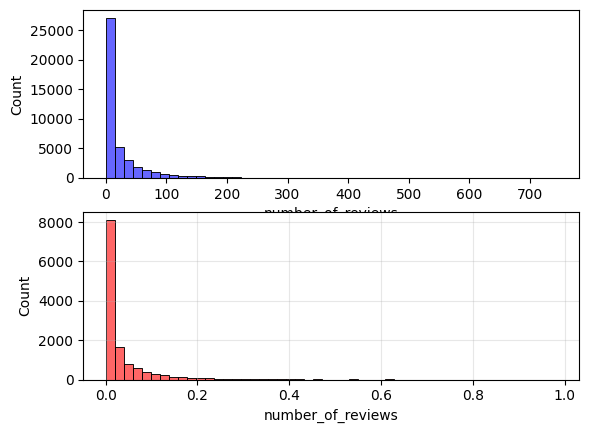

In [200]:

pict, axes = plt.subplots(2)
sns.histplot(df_l['number_of_reviews'], 
         bins=50, alpha=0.6, color='blue', label='Antes', edgecolor='black', ax=axes[0])
sns.histplot(X_test_scaled.number_of_reviews, 
         bins=50, alpha=0.6, color='red', label='Depois', edgecolor='black', ax=axes[1])

plt.grid(True, alpha=0.3)

### Explique, em Markdown, por que a normalização é importante em modelos que utilizam distância ou gradiente \(ex: KNN, regressão linear\)\.

Pois nesses tipos de modelo as variáveis possuem peso dependendo do seu valor. Sem a normalização, as variáveis com valor maior vão ter pesos maiores que outras variáveis, o que não deve acontecer.

# Síntese e conclusão

### Redija uma conclusão técnica destacando as principais correlações e insights observados\.

Na realidade não há correlações fortes entre nenhuma variável, como observado no gráfico de PairGrid, e no heatmap com a correlação de pearson, as maiores correlações tinham valor 0.04, -0.04, -0.1, 0,06. A maior correlação foi próxima de -0.1, entre 'avaliability_365' e 'number_of_reviews'. Talvez cortando alguns registros fora dos preços mais comuns as correlações fossem ficar mais fortes, mas isso afetaria a integridade da base, o melhor seria ter utilizado uma outra cidade com valores menos discrepantes, talvez. Mas por essa correlação e outras correlações mais fracas podemos especular que: As locações que possuem menos disponibilidade são as que recebem mais avaliações, o que faz sentido, já que estão sendo mais locadas. Uma correlação menos forte é entre número de reviews e a nota, nem toda locação que recee varios reviews são positivos, mas a tendência é as que gerem mais reviews positivos serem as que recebam reviews, o que pode indicar que o rating dos reviews não é algo muito preciso quando se tem poucos reviews. E uma correlação de -0.4 e 0.4 entre number_of_reviews e availability_365 respectivamente, em comparação com price, correlação que não parece fazer muito sentido, e acho que não mudaria o valor de correlação mesmo sem grandes outliers. 

### Liste as etapas realizadas de pré\-processamento e comente como elas preparam a base para futuras análises preditivas\.

Separação de Variáveis
Divisão Estratificada
Identificação de Tipos de Variáveis
Normalização com MinMaxScaler
Codificação de Variáveis Categóricas

A normalização garante que todas as variáveis possuam o mesmo peso. A divisão estratificada garante que não haverá data leakage.

### Explique como essa base poderia ser utilizada em modelos de regressão de preços ou recomendação de acomodações\.

Acho que esta base da forma que está não ajudaria muito na produção de modelos, a não ser para verificar até que ponto as avaliações começam a ser métricas mais precisas.